### Frozen Lake 8*8

Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, the ice is slippery, so you won't always move in the direction you intend.

The surface is described using a grid like the following:

SFFF       (S: starting point, safe)

FHFH       (F: frozen surface, safe)

FFFH       (H: hole, fall to your doom)

HFFG       (G: goal, where the frisbee is located)


The episode ends when you reach the goal or fall in a hole. You receive a reward of 100 if you reach the goal, -100 if you fall into the hole, and -0.1 for each step you take.

### Getting Started


Run the following code and observe the result.

In [3]:
%run FrozenLake.ipynb
import matplotlib.pyplot as plt
env = FrozenLakeEnv()
env.reset()

for _ in range(10):
    env.render()
    state, reward, done, info = env.step(env.action_space.sample()) # Take a random action
    
env.close()
move = {0: 'L', 1:'D', 2:'R', 3:'U'}



SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG


What are the action space and the state space?

In [4]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(64)


What does the following code indicate?

In [5]:
print(env.P[53][2])

[(0.15, 61, -0.1, False), (0.7, 54, -100.1, True), (0.15, 45, -0.1, False)]


### Value Iteration

Find the best policy using the Value Iteration algorithm.

In [6]:
from math import inf

gamma = 1
theta = 0.1
V = np.zeros(64)
while(True):
    delta = 0
    for i in range(64):
        v_old = V[i]
        max_return = -inf
        for decision in env.P[i]:
            Sum = 0
            for action in env.P[i][decision]:
                if action[3]:
                    Sum += action[0]*action[2]
                else:
                    Sum += action[0]*(action[2] + gamma * V[action[1]])
            if Sum > max_return:
                max_return = Sum
        V[i] = max_return
        delta = max(np.abs(V[i] - v_old), delta)
        
    if delta < theta:
        break


Print what the best action in each state is.

In [7]:
policy = np.zeros(64)
for i in range(64):
    best_choice = 0
    max_return = 0
    for decision in env.P[i]:
        Sum = 0
        for action in env.P[i][decision]:
            Sum += action[0]*(action[2] + gamma * V[action[1]])
        if Sum > max_return:
            max_return = Sum
            best_choice = decision
    policy[i] = best_choice
    if ((i+1)%8 == 0):
        print(move[best_choice])
    else:
        print(move[best_choice], end=' ')
    

R R R R R R R D
R R U U U R R D
U U L L R U R D
U U L L U L R D
U U U L R R U R
L L L R U L L R
L L D L L D L R
L D L L R R D L


Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

In [8]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()
state = 0
done = False
total_reward = 0
while(not done):
    env.render()
    state, reward, done, info = env.step(int(policy[state]))
    total_reward += reward
env.close()
print("Total Reward is ", total_reward)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF

### Q-Learning

Find the best policy using the Q-Learning algorithm.

Use an epsilon-greedy policy with decaying epsilon.

In [228]:
def Q_learning(alpha = 0.1, gamma = 1, episodes = 1000):
    Q = np.zeros(shape=(64,4))
    decaying_rate = 0.99
    rewards = np.zeros(episodes)
    epsilon = 0.3
    for i in range(episodes):
        state = 0
        is_terminal = False
        total_reward = 0
        while(not is_terminal):
            epsilon *= decaying_rate
            chance = np.random.uniform(0,1)
            if chance < epsilon:
                decision = np.random.randint(4)
            else:
                decision = np.argmax(Q[state])

            p = np.cumsum(np.transpose(env.P[state][decision])[0])
            chance = np.random.uniform(0,1)
            actions = env.P[state][decision]
            for j in range(3):
                if chance < p[j]:
                    action = actions[j]
                    break
            next_state = action[1]
            is_terminal = action[3]
            total_reward += action[2]
            Q[state][decision] += alpha*(action[2] + gamma*np.max(Q[next_state]) - Q[state][decision] ) 
            state = next_state
        rewards[i] = total_reward

    return Q, rewards
Q, rewards = Q_learning(episodes = 10000, alpha = 0.1, gamma = 1)

86.33255000000001

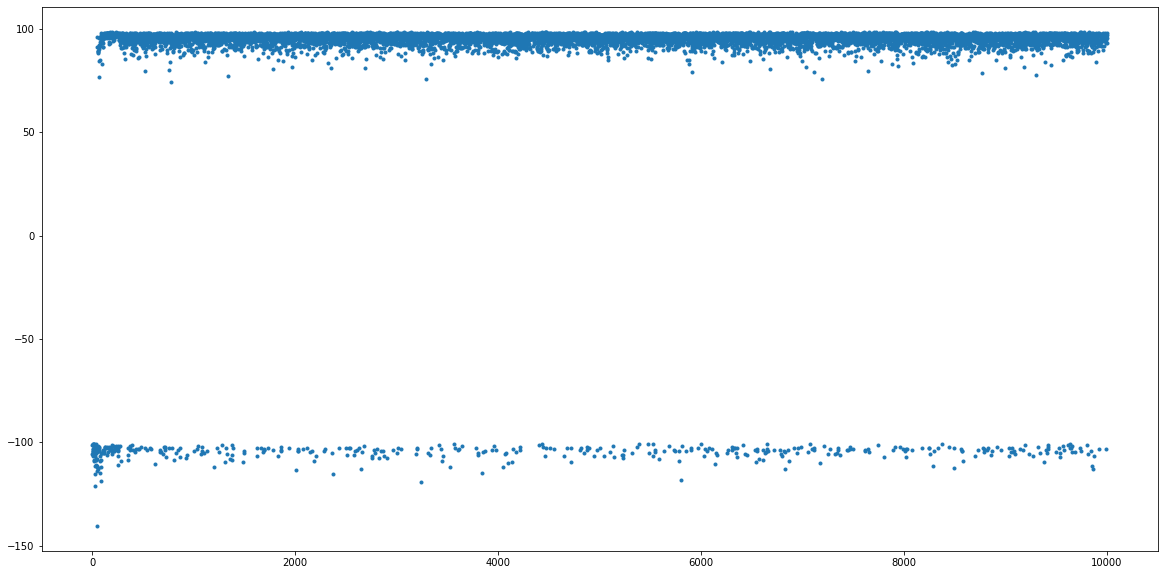

In [229]:
plt.figure(figsize = (20,10))
plt.plot(rewards, '.')
np.mean(rewards)

Print what the best action in each state is.

In [198]:
for i in range(64):
    if ((i+1)%8 == 0):
        print(move[np.argmax(Q[i])])
    else:
        print(move[np.argmax(Q[i])], end=' ')


R R R R R R R D
U U U U R R R D
U U L L R U D D
U U U L L L R D
L L U L R D U D
L L L D U L L R
L L R U L D L R
R D U L R R D L


Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

In [23]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()
state = 0
done = False
total_reward = 0
while(not done):
    env.render()
    state, reward, done, info = env.step(np.argmax(Q[state]))
    total_reward += reward
env.close()
print("Total Reward is ", total_reward)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FF

### SARSA

Find the best policy using the SARSA algorithm.

Use an epsilon-greedy policy with decaying epsilon.

In [3]:
def SARSA(alpha = 0.1, gamma = 1, decaying_rate = 0.99, epsilon = 0.3, episodes = 1000 ):
    Q = np.zeros(shape=(64,4))
    rewards = np.zeros(episodes)
    for i in range(episodes):
        state = 0
        total_reward = 0
        is_terminal = False
        while(not is_terminal):
            chance = np.random.uniform(0,1)
            if chance < epsilon:
                decision = np.random.randint(4)
            else:
                decision = np.argmax(Q[state])
            actions = env.P[state][decision]
            p = np.cumsum(np.transpose(env.P[state][decision])[0])
            for j in range(3):
                if chance < p[j]:
                    action = actions[j]
                    break
            next_state = action[1]
            is_terminal = action[3]
            total_reward += action[2]
            chance = np.random.uniform(0,1)
            if chance < epsilon*decaying_rate:
                next_decision = np.random.randint(4)
            else:
                next_decision = np.argmax(Q[next_state])
            Q[state][decision] += alpha*(action[2] + gamma*Q[next_state][next_decision] - Q[state][decision] ) 
            state = next_state
        epsilon *= decaying_rate
        rewards[i] = total_reward
    return Q, rewards

80.59603333333334

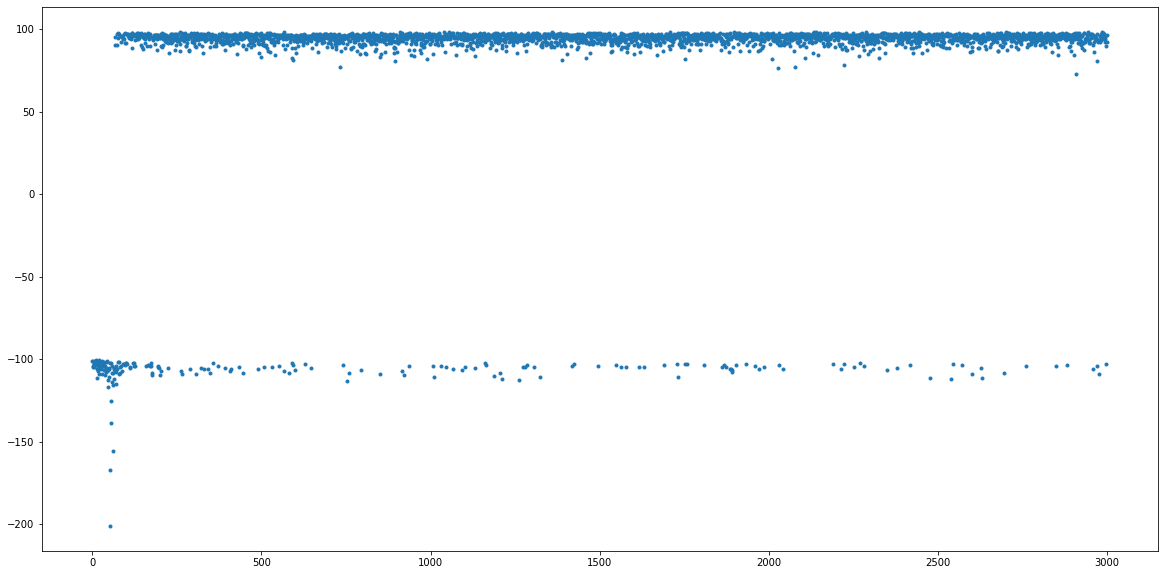

In [49]:
Q, rewards = SARSA(alpha = 0.20, gamma = 1, epsilon = 0.5, decaying_rate = 0.98, episodes = 3000)
plt.figure(figsize = (20,10))
plt.plot(rewards, '.')
np.mean(rewards)

Print what the best action in each state is.

In [39]:
for i in range(64):
    if ((i+1)%8 == 0):
        print(move[np.argmax(Q[i])])
    else:
        print(move[np.argmax(Q[i])], end=' ')

R R R R R R D L
U U D U R R D D
U L L L R U R R
U L U L L L R R
U L L L R D U R
U L L R U L L R
U L D U L L L R
R R U L D D D L


Run your agent for one episode while acting greedy with respect to the learned policy.

Show your result and print the total reward that your agent has received.

In [37]:
%run FrozenLake.ipynb

env = FrozenLakeEnv()
env.reset()
state = 0
done = False
total_reward = 0
while(not done):
    env.render()
    state, reward, done, info = env.step(np.argmax(Q[state]))
    total_reward += reward
env.close()
print("Total Reward is ", total_reward)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FFHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FF